Table of Contents

- <a href='#1'>1. Introduction</a> 
- <a href='#2'>2. Library and Data Import</a>
- <a href='#3'>3. Calculated Columns</a>
- <a href='#4'>4. 2018-2019 NBA Statistics (Regular)</a>
- <a href='#5'>5. 2018-2019 NBA Statistics (Playoff)</a>
- <a href='#6'>6. Young Potential Players in the world</a>


# <a id='1'> 1. Introduction </a>

Content
This Dataset Includes:

Seasons 1999-2020
49 Leagues, ~11K players details & stats per Season

Player Details: Birth Date, Height, Weight, Nationality, High School
Stats per Season: Scoring Stats, Free Throws, Rebounds, Blocks, Assists, Minutes, Games etc.

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

# <a id='2'> 2. Library and Data Import </a>

In [1]:
#https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues/notebooks

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv


In [2]:
df=pd.read_csv("/kaggle/input/basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv")
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School


The columns are as follows

In [3]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

The leagues included in the dataset are listed as below:

In [4]:
all_league = df['League'].unique()
print(all_league)


['NBA' 'Euroleague' 'Israeli-BSL' 'Argentinian-Liga-A' 'Australian-NBL'
 'Austrian-A-Bundesliga' 'Balkan-BIL' 'Belarusian-BPL'
 'Belgium-Scooore-League' 'Bosnian-BiH-Liga' 'Brazilian-NBB' 'British-BBL'
 'Bulgarian-NBL' 'Canadian-NBL' 'Chinese-CBA' 'Croatian-A-1-Liga'
 'Czech-NBL' 'Danish-Basketligaen' 'Estonian-Latvian-Basketball-League'
 'Eurocup' 'FIBA-Europe-Cup' 'Finnish-Korisliiga' 'French-Jeep-Elite'
 'Georgian-Super-Liga' 'German-BBL' 'Greek-HEBA-A1' 'Hungarian-NBIA'
 'Italian-Lega-Basket-Serie-A' 'Japanese-BLeague' 'Kosovo-FBK'
 'Lebanese-Division-A' 'Lithuanian-LKL' 'Luxembourg-Total-League'
 'Macedonian-Superleague' 'Mexican-LNBP' 'Netherlands-DBL'
 'New-Zealand-NBL' 'Norwegian-BLNO' 'Polish-TBL' 'Romanian-Divizia-A'
 'Serbian-KLS' 'Slovakian-Extraliga' 'Slovenian-SKL' 'South-Korean-KBL'
 'Spanish-ACB' 'Swedish-Basketligan' 'Swiss-LNA' 'Turkish-BSL'
 'Ukrainian-Superleague' 'Balkan-BIBL']


# <a id='3'> 3. Calculated Columns </a>

Average figures such as minutes played, points, total rebounds, offensive and defensive rebound, assist will be created below.

The shoot accurary figures, namely field goal %,3 points %, free throw % will also be calculated. 


The data will be divided into NBA players and non-NBA players after the insertion of calculated fields.



In [5]:
df['MinPerGame'] = round(df['MIN']/df['GP'],1)
df['PtsPerGame'] = round(df['PTS']/df['GP'],1)
df['RebPerGame']=round(df['REB']/df['GP'],1)
df['AstPerGame']=round(df['AST']/df['GP'],1)
df['BlkPerGame']=round(df['BLK']/df['GP'],1)
df['PfPerGame']=round(df['PF']/df['GP'],1)
df['ToPerGame']=round(df['TOV']/df['GP'],1)
df['StlPerGame']=round(df['STL']/df['GP'],1)

df['FieldGoal%']=round(df['FGM']*100/df['FGA'],1)
df['3Pts%']=round(df['3PM']*100/df['3PA'],1)
df['FT%']=round(df['FTM']*100/df['FTA'],1)

df['AstTovRatio'] = round(df['AST']/df['TOV'],1)
df['BMI'] = (df['weight']/2.2) / pow(df['height_cm']/100,2)
df['age']=2020-df['birth_year']

df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,BlkPerGame,PfPerGame,ToPerGame,StlPerGame,FieldGoal%,3Pts%,FT%,AstTovRatio,BMI,age
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,0.9,3.3,4.5,1.8,44.4,35.5,86.5,1.7,26.030820,31.0
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,0.3,1.7,2.9,1.1,46.3,40.1,88.8,2.7,24.296583,30.0
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,0.3,3.0,3.8,0.7,48.9,35.4,91.9,1.7,23.884390,24.0
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1.0,3.1,3.7,1.0,55.3,30.4,63.3,1.5,24.707441,26.0
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,0.1,1.7,4.8,1.1,43.7,36.1,86.0,1.9,23.149101,22.0


In [6]:
NBA_players = df[df['League']=='NBA']
Other_players = df[df['League']!='NBA']




# <a id='4'> 4. 2018-2019 NBA Statistics (Regular) </a>


I will plot the graph for top 15 Players with 

1. Highest Average Score
1. Highest Average Assist
1. Highest Average Rebound
1. Best Assist / Turnover Ratio

in 2019 - 2020 Regular Season

Players in 50-40-90 Club for Regular Season will also be found.

Let's look at the first 4 items first.



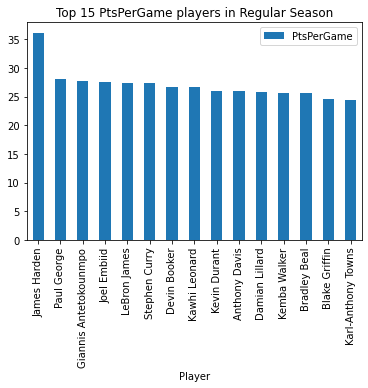

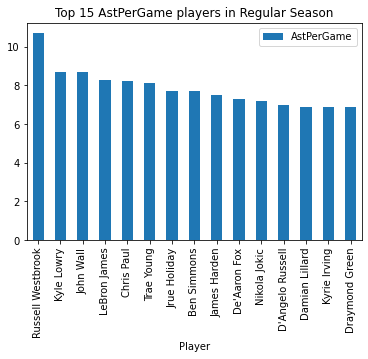

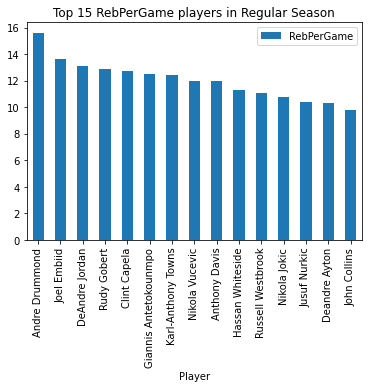

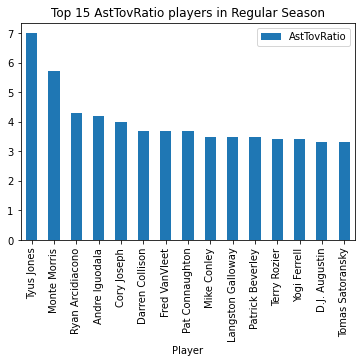

In [7]:
NBA_Regular = NBA_players[ (NBA_players['Season']=='2018 - 2019') & (NBA_players['Stage']=='Regular_Season')]

y_value = ['PtsPerGame','AstPerGame','RebPerGame','AstTovRatio']

for y in y_value:
    temp = NBA_Regular.nlargest(15,y)
    ax = temp.plot.bar(x='Player', y=y)
    title = 'Top 15 ' + y + ' players in Regular Season' 
    plt.title(title)


# Players in 50-40-90 Club 

In [8]:
#Players in 50-40-90 Club 


NBA_504090 = NBA_Regular[(NBA_Regular['FieldGoal%']>=50)&(NBA_Regular['3PM']>=40)&(NBA_Regular['FT%']>=90)]

print(NBA_504090[['Player','Team']])

               Player Team
7194  Malcolm Brogdon  MIL


Since only Malcolm Brogdon can enter the 50-40-90 club in 2018-19 Season, I will set the FT% to >=80%

In [9]:
NBA_504080 = NBA_Regular[(NBA_Regular['FieldGoal%']>=50)&(NBA_Regular['3PM']>=40)&(NBA_Regular['FT%']>=80)]

print(NBA_504080[['Player','Team']])

                  Player Team
7121        Kevin Durant  GSW
7124  Karl-Anthony Towns  MIN
7137        Nikola Jokic  DEN
7191          Joe Harris  BRK
7194     Malcolm Brogdon  MIL
7206            Rudy Gay  SAS
7211          Al Horford  BOS
7371      Meyers Leonard  POR


# <a id='5'> 5. 2018-2019 NBA Statistics (Playoff) </a>

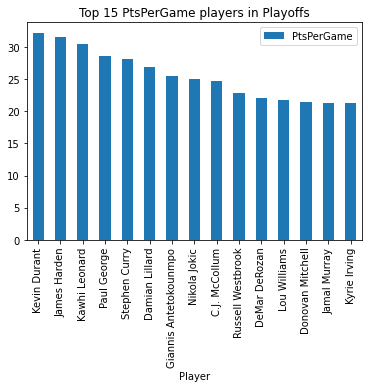

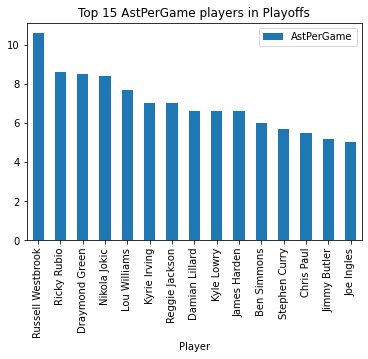

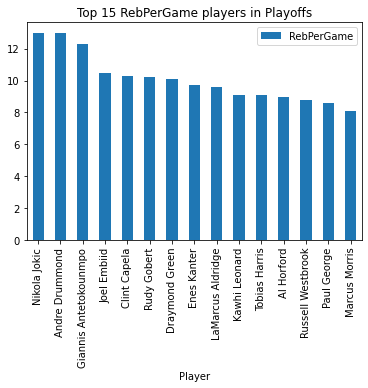

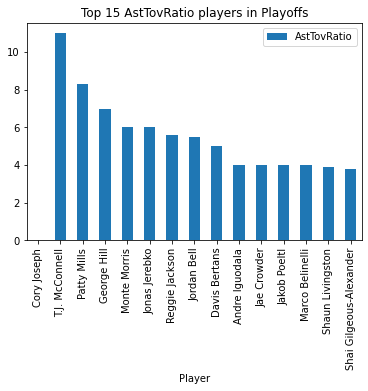

In [10]:
NBA_Playoff = NBA_players[ (NBA_players['Season']=='2018 - 2019') & (NBA_players['Stage']=='Playoffs')]
NBA_Playoff.head()


y_value = ['PtsPerGame','AstPerGame','RebPerGame','AstTovRatio']

for y in y_value:
    temp = NBA_Playoff.nlargest(15,y)
    ax = temp.plot.bar(x='Player', y=y)
    title = 'Top 15 ' + y + ' players in Playoffs' 
    plt.title(title)

The Bar of Cory Joseph in Ast/To ratio has disappeared. It maybe due to 
0 turnovers is made by  him. Let see whether this is true.

In [11]:
CJ = NBA_Playoff[NBA_Playoff['Player']=='Cory Joseph']
CJ = CJ[['Player','ToPerGame']]
print(CJ)

           Player  ToPerGame
7534  Cory Joseph        0.0


# <a id='6'> 6. Young Potential Players in the world </a>

We will also look at the young potentials (age <= 25) in the world.

# 1. Playmaker 

Criteria : 1. Ast per Game >= 6 , 2. Assist / Turnover Ratio >=3, 

# 2. Scorer

Criteria : 1. Points per game >=20 , 2. FieldGoal% >= 45% , 3. 3 Points % >=40%

# 3. Inside Man 

Crtieria : 1. Total Rebound >= 10, 2. Block per Game >= 1

# 4. All-Rounded Player

An all-rounded player contributes the team in all aspects. 
The criteria are as follows : 15+points, 5+assist, 5+rebound

In [12]:
Other_players_1920 = Other_players[Other_players['Season']=='2019 - 2020']
Young_players_1920 = Other_players[Other_players['age']<= 25]

print('Potential good Playmakers'+'\n')

Gd_Playmaker = Young_players_1920[ (Young_players_1920['AstPerGame']>=6) & (Young_players_1920['AstTovRatio']>=3)]
print(Gd_Playmaker[['League','Player','AstPerGame','AstTovRatio']])

Potential good Playmakers

                    League            Player  AstPerGame  AstTovRatio
1192        Belarusian-BPL       Brian Starr         6.8          3.8
1753           British-BBL  Kyron Cartwright         8.8          3.4
2433             Czech-NBL     Viktor Pulpan         6.2          3.2
3041       FIBA-Europe-Cup    T.J. Shorts II         6.3          5.1
4600            Kosovo-FBK      Divine Myles         6.2          3.1
6669   Swedish-Basketligan        Davon Bell         6.6          3.0
8338      Bosnian-BiH-Liga   Goran Filipovic         6.2          4.2
9799     French-Jeep-Elite   Justin Robinson         8.2          3.0
11678        Slovenian-SKL         Zan Sisko         6.8          4.1
13755         Canadian-NBL       Jaylon Tate         7.4          3.2
20136  Lebanese-Division-A        Jad Khalil         6.4          3.1


The Potential Scorers are as follows :

In [13]:
GD_scorer =  Young_players_1920[ (Young_players_1920['PtsPerGame']>=20) & (Young_players_1920['FieldGoal%']>=45) & (Young_players_1920['3Pts%']>=40)]
GD_scorer.reset_index(drop=True, inplace=True)
print('Potential Scorers'+'\n')
print(GD_scorer[['League','Player','PtsPerGame','FieldGoal%','3Pts%']])

Potential Scorers

                    League              Player  PtsPerGame  FieldGoal%  3Pts%
0              Israeli-BSL       Marcus Foster        20.2        51.3   42.3
1             Canadian-NBL         Xavier Moon        21.5        51.1   44.8
2          FIBA-Europe-Cup        Divine Myles        22.2        51.4   47.4
3       Finnish-Korisliiga        Silas Melson        21.3        51.0   44.5
4       Finnish-Korisliiga        Steph Branch        21.1        55.6   43.8
5            Greek-HEBA-A1     Conner Frankamp        20.9        48.0   42.3
6               Polish-TBL      Robert Johnson        20.2        51.7   42.9
7              Balkan-BIBL     Conner Frankamp        21.7        59.0   48.0
8      Danish-Basketligaen     Deionte Simmons        20.1        67.2   75.0
9   Macedonian-Superleague         Gabe Bealer        23.5        51.9   42.3
10             Serbian-KLS  Marcus LoVett, Jr.        20.6        53.7   49.5
11           Slovenian-SKL         David Kral

In [14]:
GD_insider =  Young_players_1920[ (Young_players_1920['RebPerGame']>=10) & (Young_players_1920['BlkPerGame']>=1) ]
print('Potential Inside Man'+'\n')
print(GD_insider[['League','Player','RebPerGame','BlkPerGame']])

Potential Inside Man

                                   League              Player  RebPerGame  \
675                    Argentinian-Liga-A      Horace Spencer        11.6   
1799                        Bulgarian-NBL   Milenko Veljkovic        14.8   
1975                          Chinese-CBA             Zhou Qi        13.1   
1978                          Chinese-CBA           Jinqiu Hu        10.0   
2000                          Chinese-CBA      Dakari Johnson        14.5   
2664   Estonian-Latvian-Basketball-League        Montae Glenn        10.5   
4363                     Japanese-BLeague       Kennedy Meeks        10.9   
4673                  Lebanese-Division-A      Phillip Rankin        10.0   
6230                     South-Korean-KBL      Chinanu Onuaku        10.3   
8215                       Belarusian-BPL    Kiryl Vinakuraua        10.7   
8776                          Chinese-CBA      Dakari Johnson        14.8   
10499                    Japanese-BLeague          Ben

In [15]:
GD_allRound =  Young_players_1920[ (Young_players_1920['PtsPerGame']>=15) &(Young_players_1920['RebPerGame']>=5) & (Young_players_1920['AstPerGame']>=5) ]
print('Potential All-Rounded Player'+'\n')
print(GD_allRound[['League','Player','PtsPerGame','AstPerGame','RebPerGame']])

Potential All-Rounded Player

                    League                     Player  PtsPerGame  AstPerGame  \
1192        Belarusian-BPL                Brian Starr        16.3         6.8   
1409      Bosnian-BiH-Liga               Corlbe Ervin        18.8         5.6   
1535         Brazilian-NBB            George de Paula        15.5         7.5   
1703           British-BBL  Parker Jackson-Cartwright        19.9         7.4   
1884          Canadian-NBL                Xavier Moon        21.5         5.2   
1894          Canadian-NBL             Jeremiah Mordi        16.0         5.9   
2058           Chinese-CBA                 Kay Felder        18.9         8.4   
3303    Finnish-Korisliiga               Steph Branch        21.1         5.2   
4594            Kosovo-FBK              Valon Bunjaku        16.2         6.3   
4595            Kosovo-FBK             Malcolm Canada        22.6         6.5   
4690   Lebanese-Division-A                Ali Mansour        16.3         5.7  